# This Project Is All About Predicting Presence

# Creation of our csv database. 
Adding each student from the beginning of the class to a list called names. and our columns of interest that we started collecting data on in a list called columns. 

In [71]:
# import pandas as pd

# # List of student names
# names = [
#     "Ogechukwu, Tasie", "Ragland, Joy", "McCallum, Tymeeka", "Treski, Karin", 
#     "Byrd, Reah", "Keeter, Jessica", "Onyebinachi, Kingsley", "Mendez, Alex", 
#     "Martin, Djuvane", "McClellan, Alexis", "Davison, Arthur", "McCall, Cheri", 
#     "Martin, Justin", "Rich, Kiana", "Thiera, Taylor", "Cummings, Latoya", 
#     "Robinson, Nadia", "Green, Yvette", "Willie, T’uana", "Izzard, Atavia", 
#     "Houston, Bria"
# ]

# # Create a DataFrame
# columns = [
#     "Name", "DOB", "Undergraduate", "Graduate", "Doctorate", "Time_to_Graduate", 
#     "Years_of_Work_Experience", "LinkedIn_Profile_Completed", "LinkedIn_Connections", 
#     "Certifications", "Relevant_Technical_Skills", "Python_Skill", "SQL_Skill", 
#     "Excel_Skill", "R_Skill", "Tableau_Skill", "Bootcamp_Interest"
# ]

# df = pd.DataFrame(names, columns=["Name"])

# # Add empty columns
# for column in columns[1:]:
#     df[column] = ""

# # Save as CSV
# df.to_csv('bootcamp_student_data_raw.csv', index=False)

# print("hi hi!")
# print("The base data to colect for each user has been saved, no more hi hi's.")


In [72]:
# import sqlite3
# import pandas as pd

# # Step 1: Create SQLite database and table
# def create_database():
#     # Connect to SQLite (creates the database if it doesn't exist)
#     conn = sqlite3.connect('bootcamp_students.db')
#     cursor = conn.cursor()

#     # Create table matching the CSV schema
#     cursor.execute('''
#     CREATE TABLE IF NOT EXISTS students (
#         Name TEXT,
#         DOB TEXT,
#         Undergraduate REAL,
#         Graduate REAL,
#         Doctorate REAL,
#         Time_to_Graduate REAL,
#         Years_of_Work_Experience REAL,
#         LinkedIn_Profile_Completed REAL,
#         LinkedIn_Connections REAL,
#         Certifications REAL,
#         Relevant_Technical_Skills REAL,
#         Python_Skill REAL,
#         SQL_Skill REAL,
#         Excel_Skill REAL,
#         Attendance REAL,
#         R_Skill REAL,
#         Tableau_Skill REAL,
#         Bootcamp_Interest REAL
#     )
#     ''')

#     conn.commit()
#     conn.close()

# # Step 2: Upload CSV data into SQLite database
# def boot_database(csv_file):
#     # Read CSV file
#     df = pd.read_csv(csv_file)

#     # Connect to SQLite database
#     conn = sqlite3.connect('bootcamp_students.db')

#     # Insert the DataFrame into the SQLite database
#     df.to_sql('students', conn, if_exists='replace', index=False)

#     conn.close()

# # Step 3: Fetch data from SQLite instead of CSV
# def fetch_data_from_database():
#     # Connect to the SQLite database
#     conn = sqlite3.connect('bootcamp_students.db')

#     # Query the data
#     df = pd.read_sql_query("SELECT * FROM students", conn)

#     conn.close()

#     return df

# # Usage
# create_database()  # Step 1: Create the database and table
# upload_data_to_database('bootcamp_student_data_filled.csv')  # Step 2: Upload CSV data to the database
# df = fetch_data_from_database()  # Step 3: Fetch data from SQLite
# print(df.head())  # Verify the data

# Use this in place of reading CSV
# df = boot_database()  # Now you are fetching data from SQLite instead of CSV

# Rest of your script stays the same


# LET US BEGIN

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv('bootcamp_student_data_filled.csv')

In [74]:
print(df)

                     Name  DOB  Undergraduate  Graduate  Doctorate  \
0        Ogechukwu, Tasie  NaN            1.0       1.0        1.0   
1            Ragland, Joy  NaN            1.0       0.0        0.0   
2       McCallum, Tymeeka  NaN            1.0       0.0        0.0   
3           Treski, Karin  NaN            0.0       0.0        0.0   
4              Byrd, Reah  NaN            1.0       0.0        0.0   
5         Keeter, Jessica  NaN            NaN       0.0        0.0   
6   Onyebinachi, Kingsley  NaN            1.0       0.0        0.0   
7            Mendez, Alex  NaN            1.0       0.0        0.0   
8         Martin, Djuvane  NaN            1.0       0.0        0.0   
9       McClellan, Alexis  NaN            1.0       0.0        0.0   
10        Davison, Arthur  NaN            1.0       0.0        0.0   
11          McCall, Cheri  NaN            NaN       NaN        NaN   
12         Martin, Justin  NaN            1.0       1.0        0.0   
13            Rich, 

# Pre-Process the Data Frame

assuming there are empty spots, which there are. We will fill in those empty spots with 0's

In [75]:
df = df.fillna(0)


In [76]:
# Iterate through each row and print each student's details in a clean format
for index, row in df.iterrows():
    print(f"Index: {index}")
    print(f"Name: {row['Name']}")
    print(f"DOB: {row['DOB']}")
    print(f"Undergraduate: {row['Undergraduate']}")
    print(f"Graduate: {row['Graduate']}")
    print(f"Doctorate: {row['Doctorate']}")
    print(f"Time_to_Graduate: {row['Time_to_Graduate']}")
    print(f"Years_of_Work_Experience: {row['Years_of_Work_Experience']}")
    print(f"LinkedIn_Profile_Completed: {row['LinkedIn_Profile_Completed']}")
    print(f"LinkedIn_Connections: {row['LinkedIn_Connections']}")
    print(f"Certifications: {row['Certifications']}")
    print(f"Relevant_Technical_Skills: {row['Relevant_Technical_Skills']}")
    print(f"Python_Skill: {row['Python_Skill']}")
    print(f"SQL_Skill: {row['SQL_Skill']}")
    print(f"Excel_Skill: {row['Excel_Skill']}")
    print(f"R_Skill: {row['R_Skill']}")
    print(f"Tableau_Skill: {row['Tableau_Skill']}")
    print(f"Bootcamp_Interest: {row['Bootcamp_Interest']}")
    print('-' * 50)  # Separator line between records


Index: 0
Name: Ogechukwu, Tasie
DOB: 0.0
Undergraduate: 1.0
Graduate: 1.0
Doctorate: 1.0
Time_to_Graduate: 0.0
Years_of_Work_Experience: 8.0
LinkedIn_Profile_Completed: 1.0
LinkedIn_Connections: 347.0
Certifications: 3
Relevant_Technical_Skills: 5.0
Python_Skill: 1.0
SQL_Skill: 1.0
Excel_Skill: 1.0
R_Skill: 0.0
Tableau_Skill: 1.0
Bootcamp_Interest: 1.0
--------------------------------------------------
Index: 1
Name: Ragland, Joy
DOB: 0.0
Undergraduate: 1.0
Graduate: 0.0
Doctorate: 0.0
Time_to_Graduate: 0.0
Years_of_Work_Experience: 9.0
LinkedIn_Profile_Completed: 1.0
LinkedIn_Connections: 40.0
Certifications: 1
Relevant_Technical_Skills: 5.0
Python_Skill: 1.0
SQL_Skill: 1.0
Excel_Skill: 1.0
R_Skill: 0.0
Tableau_Skill: 1.0
Bootcamp_Interest: 1.0
--------------------------------------------------
Index: 2
Name: McCallum, Tymeeka
DOB: 0.0
Undergraduate: 1.0
Graduate: 0.0
Doctorate: 0.0
Time_to_Graduate: 0.0
Years_of_Work_Experience: 20.0
LinkedIn_Profile_Completed: 1.0
LinkedIn_Connectio

In [77]:
# Data Preprocessing
mod_df = df.fillna(0)


In [78]:
print(mod_df)

                     Name  DOB  Undergraduate  Graduate  Doctorate  \
0        Ogechukwu, Tasie  0.0            1.0       1.0        1.0   
1            Ragland, Joy  0.0            1.0       0.0        0.0   
2       McCallum, Tymeeka  0.0            1.0       0.0        0.0   
3           Treski, Karin  0.0            0.0       0.0        0.0   
4              Byrd, Reah  0.0            1.0       0.0        0.0   
5         Keeter, Jessica  0.0            0.0       0.0        0.0   
6   Onyebinachi, Kingsley  0.0            1.0       0.0        0.0   
7            Mendez, Alex  0.0            1.0       0.0        0.0   
8         Martin, Djuvane  0.0            1.0       0.0        0.0   
9       McClellan, Alexis  0.0            1.0       0.0        0.0   
10        Davison, Arthur  0.0            1.0       0.0        0.0   
11          McCall, Cheri  0.0            0.0       0.0        0.0   
12         Martin, Justin  0.0            1.0       1.0        0.0   
13            Rich, 

In [79]:
# Here we define both X and Y. We will be dropping the Name and our Y for our X
y = mod_df['Bootcamp_Interest']
X = mod_df.drop(['Name', 'Bootcamp_Interest', 'DOB', 'Time_to_Graduate'], axis=1)

# X's and Y's 

In [80]:
# Here we observe features stored in the X value, we need not review Y.
X

,Undergraduate,Graduate,Doctorate,Years_of_Work_Experience,LinkedIn_Profile_Completed,LinkedIn_Connections,Certifications,Relevant_Technical_Skills,Python_Skill,SQL_Skill,Excel_Skill,Attendance,R_Skill,Tableau_Skill
0,1.0,1.0,1.0,8.0,1.0,347.0,3,5.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,9.0,1.0,40.0,1,5.0,1.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,20.0,1.0,200.0,3,5.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,10.0,1.0,30.0,1,5.0,1.0,1.0,1.0,1.0,0.0,1.0
4,1.0,0.0,0.0,5.0,1.0,0.0,0,5.0,1.0,1.0,1.0,1.0,0.0,1.0
5,0.0,0.0,0.0,8.0,1.0,211.0,3,5.0,1.0,1.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,5.0,1.0,400.0,2,5.0,1.0,1.0,1.0,1.0,0.0,0.0
7,1.0,0.0,0.0,5.0,0.0,0.0,2,5.0,1.0,1.0,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,9.0,1.0,340.0,1,6.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,0.0,0.0,3.0,1.0,20.0,2,4.0,1.0,0.0,1.0,0.0,0.0,0.0


# Feature Scaling
This is where we will observe our data set to ensure of two things. That there are no strings, and that there are not large numbers.  We will focus on Years_of Work_Experience, LinkedIn_Connections, and Certifications

In [81]:
# Use this feature if the need to encode categorical variables
# X = pd.get_dummies(X)

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Instantiate the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply MinMaxScaler to 'Years_of_Work_Experience' and 'LinkedIn_Connections'
mod_df[['Years_of_Work_Experience', 'LinkedIn_Connections']] = minmax_scaler.fit_transform(
    mod_df[['Years_of_Work_Experience', 'LinkedIn_Connections']]
)

# Apply StandardScaler to 'Certifications'
mod_df[['Certifications']] = standard_scaler.fit_transform(mod_df[['Certifications']])

mod_df['Standardized_Technical_Skills'] = mod_df['Relevant_Technical_Skills'].apply(lambda x: 1 if x >= 5 else 0)
mod_df.drop('Relevant_Technical_Skills', axis=1, inplace=True)

# df.drop('Relevant_Technical_Skills', axis=1, inplace=True)


In [83]:
# Here we define both X and Y. We will be dropping the Name and our Y for our X
y = mod_df['Bootcamp_Interest']
X = mod_df.drop(['Name', 'Bootcamp_Interest', 'DOB', 'Time_to_Graduate'], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)


In [84]:
X

,Undergraduate,Graduate,Doctorate,Years_of_Work_Experience,LinkedIn_Profile_Completed,LinkedIn_Connections,Certifications,Python_Skill,SQL_Skill,Excel_Skill,Attendance,R_Skill,Tableau_Skill,Standardized_Technical_Skills
0,1.0,1.0,1.0,0.40,1.0,0.708163,0.890724,1.0,1.0,1.0,1.0,0.0,1.0,1
1,1.0,0.0,0.0,0.45,1.0,0.081633,-0.668043,1.0,1.0,1.0,1.0,0.0,1.0,1
2,1.0,0.0,0.0,1.00,1.0,0.408163,0.890724,1.0,1.0,1.0,0.0,0.0,1.0,1
3,0.0,0.0,0.0,0.50,1.0,0.061224,-0.668043,1.0,1.0,1.0,1.0,0.0,1.0,1
4,1.0,0.0,0.0,0.25,1.0,0.000000,-1.447426,1.0,1.0,1.0,1.0,0.0,1.0,1
5,0.0,0.0,0.0,0.40,1.0,0.430612,0.890724,1.0,1.0,1.0,0.0,0.0,0.0,1
6,1.0,0.0,0.0,0.25,1.0,0.816327,0.111340,1.0,1.0,1.0,1.0,0.0,0.0,1
7,1.0,0.0,0.0,0.25,0.0,0.000000,0.111340,1.0,1.0,1.0,0.0,0.0,0.0,1
8,1.0,0.0,0.0,0.45,1.0,0.693878,-0.668043,1.0,1.0,1.0,1.0,1.0,1.0,1
9,1.0,0.0,0.0,0.15,1.0,0.040816,0.111340,1.0,0.0,1.0,0.0,0.0,0.0,0


As you can see the Standardized Scaler was applied to the Certifications column
And the MinMax Scaler was applied to the LinkedIn_Connections and the
Years_of_Work_Experience columns.

In [85]:
# Prints the testing data and the training 
# data to get a visual of what is being used
# Print shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Print example rows from training data
print("\nTraining data:")
print(X_train)

# Print example rows from test data
print("\nTest data:")
print(X_test)

# Print target values for the first few examples
print("\nTraining target values:")
print(y_train)

print("\nTest target values:")
print(y_test)


Training data shape: (16, 14)
Test data shape: (5, 14)

Training data:
    Undergraduate  Graduate  Doctorate  Years_of_Work_Experience  \
5             0.0       0.0        0.0                      0.40   
17            1.0       1.0        0.0                      0.75   
19            0.0       0.0        0.0                      0.00   
3             0.0       0.0        0.0                      0.50   
18            0.0       0.0        0.0                      0.00   
16            0.0       0.0        0.0                      0.00   
10            1.0       0.0        0.0                      0.25   
0             1.0       1.0        1.0                      0.40   
12            1.0       1.0        0.0                      0.25   
9             1.0       0.0        0.0                      0.15   
7             1.0       0.0        0.0                      0.25   
20            1.0       1.0        0.0                      0.45   
2             1.0       0.0        0.0       

In [86]:
# Fetch names from the original dataset using the same indices used for splitting
train_names = df.loc[X_train.index, 'Name']  # Names for training data
test_names = df.loc[X_test.index, 'Name']    # Names for testing data

# Print target values for the first few examples (Training)
print("\nTraining target values (with names):")
train_target_with_names = pd.DataFrame({'Name': train_names.values, 'Target': y_train.values})
print(train_target_with_names)

# Print target values for the first few examples (Test)
print("\nTest target values (with names):")
test_target_with_names = pd.DataFrame({'Name': test_names.values, 'Target': y_test.values})
print(test_target_with_names)



Training target values (with names):
                 Name  Target
0     Keeter, Jessica     0.0
1       Green, Yvette     0.0
2      Izzard, Atavia     0.0
3       Treski, Karin     1.0
4      Willie, T'uana     0.0
5     Robinson, Nadia     0.0
6     Davison, Arthur     0.0
7    Ogechukwu, Tasie     1.0
8      Martin, Justin     0.0
9   McClellan, Alexis     0.0
10       Mendez, Alex     0.0
11      Houston, Bria     0.0
12  McCallum, Tymeeka     0.0
13         Byrd, Reah     1.0
14      McCall, Cheri     0.0
15       Ragland, Joy     1.0

Test target values (with names):
                    Name  Target
0        Martin, Djuvane     1.0
1         Thiera, Taylor     0.0
2  Onyebinachi, Kingsley     1.0
3            Rich, Kiana     1.0
4       Cummings, Latoya     0.0


# K-Nearest Neighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Make predictions on the test data
y_pred = knn.predict(X_test)


# Generate classification rep ort
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         2
         1.0       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



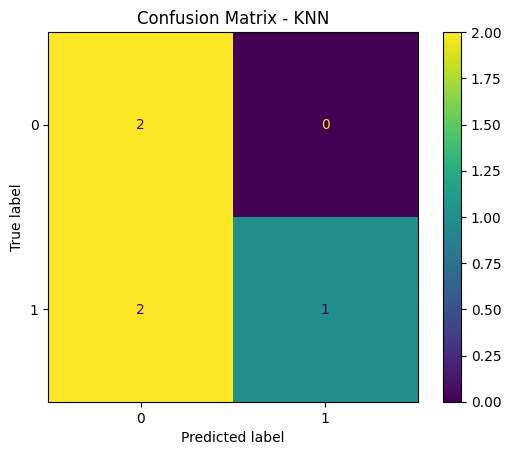

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("Confusion Matrix - KNN")
plt.show()


# Logistic Regression

In [89]:
# Here we define both X and Y. We will be dropping the Name and our Y for our X
y = mod_df['Bootcamp_Interest']
X = mod_df.drop(['Name', 'Bootcamp_Interest', 'DOB', 'Time_to_Graduate'], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate the model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



# Support Vector Machine (SVM)

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Instantiate the model
svm = SVC(kernel='linear', probability=True)

# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [92]:
# Add the predictions to a new column in the DataFrame
mod_df.loc[X_test.index, 'Predicted_Graduates'] = y_pred
mod_df.fillna(0, inplace=True)


In [93]:
# Filter rows where 'Predicted_Graduates' is 1
filtered_df = mod_df[mod_df['Predicted_Graduates'] == 1][['Name', 'Predicted_Graduates']]

# Print the index, name, and predicted graduates
print(filtered_df.reset_index(drop=True))

                    Name  Predicted_Graduates
0  Onyebinachi, Kingsley                  1.0
1        Martin, Djuvane                  1.0
2            Rich, Kiana                  1.0


In [94]:
# Now we will save the updated mod_df to a csv file
mod_df.to_csv('bootcamp_grad_mod_predictions_test.csv', index=False)

In [95]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


F1 Score: 1.0


In [96]:
# Get feature importance using logreg
importance = logreg.coef_[0]
features = X.columns

# Combine features and importance into a list of tuples and sort by importance
feature_importance = sorted(zip(features, importance), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
for feature, score in feature_importance:
    print(f"Feature: {feature}, Score: {score:.5f}")


Feature: Attendance, Score: 1.16684
Feature: Tableau_Skill, Score: 0.91999
Feature: SQL_Skill, Score: 0.52925
Feature: LinkedIn_Profile_Completed, Score: 0.37180
Feature: Python_Skill, Score: 0.37023
Feature: Doctorate, Score: 0.35951
Feature: Standardized_Technical_Skills, Score: 0.32968
Feature: Excel_Skill, Score: 0.25339
Feature: Graduate, Score: 0.15994
Feature: Undergraduate, Score: 0.05907
Feature: LinkedIn_Connections, Score: 0.05317
Feature: Years_of_Work_Experience, Score: 0.01653
Feature: R_Skill, Score: 0.00000
Feature: Certifications, Score: -0.55200


In [97]:
# False Negatives (FN): Actual 1, Predicted 0
false_negatives = X_test[(y_test == 1) & (y_pred == 0)]
print("False Negatives (FN):")
print(false_negatives.to_string(index=False))

# False Positives (FP): Actual 0, Predicted 1
false_positives = X_test[(y_test == 0) & (y_pred == 1)]
print("\nFalse Positives (FP):")
print(false_positives.to_string(index=False))


False Negatives (FN):
Empty DataFrame
Columns: [Undergraduate, Graduate, Doctorate, Years_of_Work_Experience, LinkedIn_Profile_Completed, LinkedIn_Connections, Certifications, Python_Skill, SQL_Skill, Excel_Skill, Attendance, R_Skill, Tableau_Skill, Standardized_Technical_Skills]
Index: []

False Positives (FP):
Empty DataFrame
Columns: [Undergraduate, Graduate, Doctorate, Years_of_Work_Experience, LinkedIn_Profile_Completed, LinkedIn_Connections, Certifications, Python_Skill, SQL_Skill, Excel_Skill, Attendance, R_Skill, Tableau_Skill, Standardized_Technical_Skills]
Index: []


# Save and test the Model

In [98]:
import joblib

# Assuming your SVM model is stored in a variable called 'svm_model'
# Save the trained model to a file
joblib.dump(logreg, 'hire_us.pkl')

# Save the fitted scalers
joblib.dump(standard_scaler, 'standard_scaler.pkl')  # Saving the StandardScaler
joblib.dump(minmax_scaler, 'minmax_scaler.pkl')      # Saving the MinMaxScaler

print("Model and Scalers saved as .pkl files")


Model and Scalers saved as .pkl files


In [99]:
import pandas as pd
import joblib

# Load the saved SVM model
svm_model = joblib.load('hire_us.pkl')

# Load the saved scalers
standard_scaler = joblib.load('standard_scaler.pkl')
minmax_scaler = joblib.load('minmax_scaler.pkl')
# Load your CSV file into a DataFrame
test_df = pd.read_csv('bootcamp_student_data_filled.csv')

test_df = test_df.fillna(0)

In [100]:
# Apply the scalers to the test data
test_df[['Years_of_Work_Experience', 'LinkedIn_Connections']] = minmax_scaler.transform(
    test_df[['Years_of_Work_Experience', 'LinkedIn_Connections']]
)

test_df[['Certifications']] = standard_scaler.transform(test_df[['Certifications']])

# Apply manual transformation to 'Relevant_Technical_Skills'
test_df['Standardized_Technical_Skills'] = test_df['Relevant_Technical_Skills'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the 'Relevant_Technical_Skills' column
test_df.drop('Relevant_Technical_Skills', axis=1, inplace=True)

In [101]:
# Prepare the test data by dropping the irrelevant columns (similar to how you prepared X)
X_test = test_df.drop(['Name', 'Bootcamp_Interest', 'DOB', 'Time_to_Graduate'], axis=1)

y_pred_2 = svm_model.predict(X_test)

In [102]:
# Output the predictions
print("Predicted Bootcamp Interest:")
print(y_pred_2)

Predicted Bootcamp Interest:
[1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [103]:
# Add the predictions to a new column in the DataFrame
test_df.loc[X_test.index, 'Predicted_Graduates'] = y_pred_2
test_df.fillna(0, inplace=True)

# Filter rows where 'Predicted_Graduates' is 1
full_test = test_df[test_df['Predicted_Graduates'] == 1][['Name', 'Predicted_Graduates']]

# Print the index, name, and predicted graduates
print(full_test.reset_index(drop=True))

               Name  Predicted_Graduates
0  Ogechukwu, Tasie                  1.0
1      Ragland, Joy                  1.0
2     Treski, Karin                  1.0
3        Byrd, Reah                  1.0
4   Martin, Djuvane                  1.0
5       Rich, Kiana                  1.0


In [104]:
# Now we will save the updated mod_df to a csv file
test_df.to_csv('bootcamp_grad_mod_predictions_all.csv', index=False)

# THE END